# **SVRegression**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#load datset
dataset = pd.read_csv('/content/Experience-Salary.csv')
dataset

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [9]:
# Memisahkan fitur dan label
X = dataset.iloc[:, 0].values.reshape(-1, 1)  # Memastikan X adalah array 2D
y = dataset.iloc[:, 1].values

# Apply StandardScaler to standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#spillting dataset untuk traaining dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting Regression model to the dataset
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

# Predicting hasil Test set
y_pred = regressor.predict(X_test)

# Hitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Hitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Hitung Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mengukur R^2 score untuk akurasi model regresi
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 4.161793617562643
Mean Squared Error: 27.643910538179288
Root Mean Squared Error: 5.257747667792673
R^2 Score: 0.6209130846050479


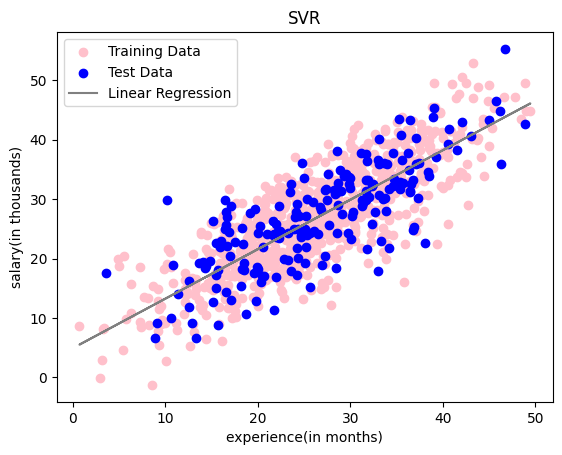

In [11]:
# Visualisasi model
plt.scatter(X_train, y_train, color='pink', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_train, regressor.predict(X_train), color='gray', label='Linear Regression')
plt.title('SVR')
plt.xlabel('experience(in months)')
plt.ylabel('salary(in thousands)')
plt.legend()
plt.show()
